In [3]:
from google.colab import files

uploaded = files.upload()

#to upload my files in google collab


Saving IRIS.csv to IRIS.csv


In [64]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization


In [90]:
df = pd.read_csv("IRIS.csv")  # Reading the IRIS dataset from a CSV file into a pandas DataFrame
df.head()  # Displaying the first five rows of the DataFrame to inspect the data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.describe()  # Generates summary statistics for numerical columns, including count, mean, std, min, and quartiles


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
df.info()  # Displays a summary of the DataFrame, including column names, non-null counts, and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **CLEANING DATA**

In [68]:
df.isnull().sum()  # Checks for missing values in each column and returns the count of null values per column


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [91]:
df[df.isnull()]  # This attempt to filter rows with missing values won't work correctly,
                 # as `df.isnull()` returns a DataFrame of booleans, not a boolean index.


,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN


In [92]:
df.dropna(axis=0, inplace=True)  # Removes all rows with missing values from the DataFrame and updates it in place


In [71]:
df.duplicated().sum()  # Counts the number of duplicate rows in the DataFrame


np.int64(3)

In [72]:
df.drop_duplicates(inplace=True)  # Removes duplicate rows from the DataFrame and updates it in place


In [97]:
df = df.dropna()
# Removes any remaining rows with missing values from the DataFrame
# and updates `df` with the cleaned version.


# ***Preprocessing***

In [73]:
print(df.dtypes)  # Displays the data types of each column in the DataFrame


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [74]:
df['species'] = pd.to_numeric(df['species'], errors='coerce')
# Attempts to convert the 'species' column to a numeric data type.
# If conversion fails for any value (e.g., non-numeric strings), it replaces them with NaN.


In [75]:
df.dropna(subset=['species'], inplace=True)
# Removes rows where the 'species' column contains NaN values after the conversion attempt.


In [76]:
df['sepal_length'].value_counts()
# Returns the count of unique values in the 'sepal_length' column,
# showing how many times each distinct value appears.


,count
sepal_length,


In [78]:
df['sepal_width'].value_counts()
# Returns the count of unique values in the 'sepal_width' column,
# showing how frequently each distinct value appears.


,count
sepal_width,


In [79]:
df['petal_length'].value_counts()
# Returns the count of unique values in the 'petal_length' column,
# showing how often each distinct value appears.


,count
petal_length,


In [80]:
df['petal_width'].value_counts()
# Returns the count of unique values in the 'petal_width' column,
# showing how frequently each distinct value appears.


,count
petal_width,


<ipython-input-27-28b7c3870336>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[features].values, vert=True, patch_artist=True, labels=features)


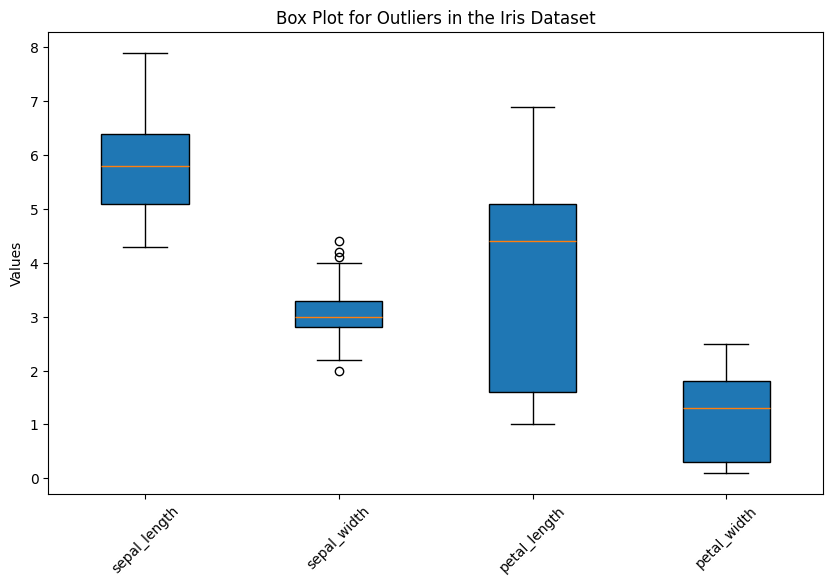

In [27]:
# Extract only numerical features (excluding the species column)
features = df.columns[:-1]  # Select all columns except the last one (species)

# Create a Box Plot using Matplotlib
plt.figure(figsize=(10, 6))  # Set figure size
plt.boxplot(df[features].values, vert=True, patch_artist=True, labels=features)

# Improve visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Box Plot for Outliers in the Iris Dataset")
plt.ylabel("Values")

# Display the plot
plt.show()

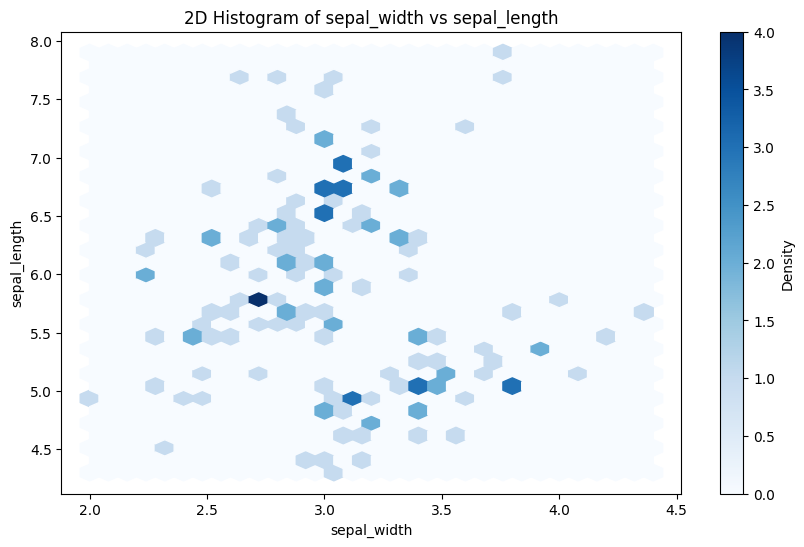

In [98]:
x_feature = 'sepal_width'
y_feature = 'sepal_length'

plt.figure(figsize=(10,6))  # Sets the figure size for better visualization

plt.hexbin(df[x_feature], df[y_feature], gridsize=30, cmap='Blues')
# Creates a 2D hexagonal binned plot to visualize density of data points

plt.colorbar(label='Density')  # Adds a color bar to indicate density levels

plt.xlabel(x_feature)  # Labels the x-axis dynamically based on the variable name
plt.ylabel(y_feature)  # Labels the y-axis dynamically based on the variable name

plt.title(f'2D Histogram of {x_feature} vs {y_feature}')
# Sets the title dynamically using f-string formatting

plt.show()  # Displays the plot


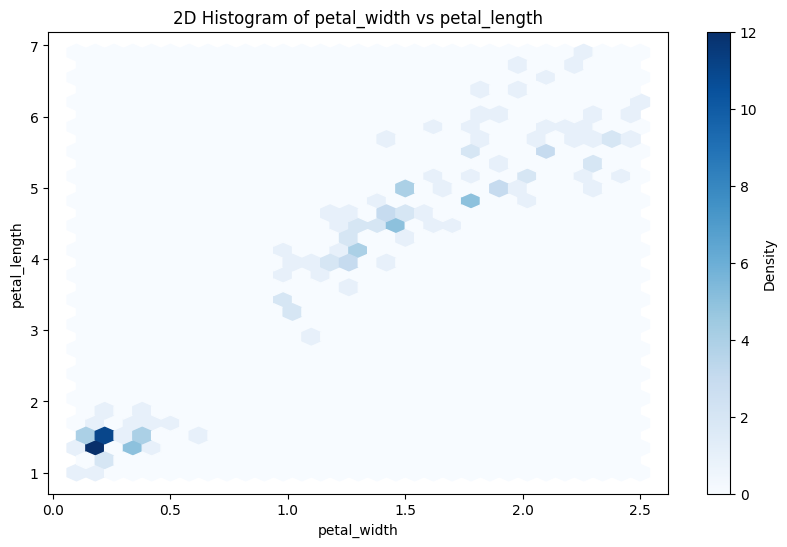

In [99]:
x_feature = 'petal_width'
y_feature = 'petal_length'

plt.figure(figsize=(10,6))  # Sets the figure size for better visualization

plt.hexbin(df[x_feature], df[y_feature], gridsize=30, cmap='Blues')
# Creates a 2D hexagonal binned plot to visualize density of data points
# Note: Use `gridsize=30` instead of `bins=30`, as `bins` is not a valid parameter for `hexbin()`.

plt.colorbar(label='Density')  # Adds a color bar to indicate density levels

plt.xlabel(x_feature)  # Dynamically labels the x-axis
plt.ylabel(y_feature)  # Dynamically labels the y-axis

plt.title(f'2D Histogram of {x_feature} vs {y_feature}')
# Fixes the title formatting for better readability

plt.show()  # Displays the plot


In [100]:
print("y shape:", y.shape)
# Prints the shape of the `y` variable (typically the target variable in a dataset).
# It shows the number of samples and, if applicable, the number of dimensions.

print("y unique values:", y.unique())
# Prints the unique values in `y`, which is useful for checking the distribution of classes
# in classification problems or identifying unique labels in a dataset.


y shape: (150,)
y unique values: ['setosa' 'versicolor' 'virginica']


In [101]:
from sklearn.model_selection import train_test_split  # Importing function for splitting dataset

X = df.iloc[:, :-1]  # Selecting all columns except the last one as features (X)
y = df['species']  # Selecting the 'species' column as the target variable (y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# `test_size=0.2` means 20% of the data will be used for testing, while 80% will be for training.
# `random_state=42` ensures reproducibility, so the split remains the same each time the code runs.


In [102]:
X_train = X_train[~y_train.isnull()]  # Removes rows in X_train where y_train has missing values
y_train = y_train.dropna()  # Drops any NaN values from y_train


In [103]:
print(y_train.isnull().sum())
# Prints the total number of missing (NaN) values in y_train.
# If the output is 0, it means there are no missing values in the training labels.


0


In [104]:
y_train = y_train.dropna()  # Removes any missing (NaN) values from y_train
X_train = X_train.loc[y_train.index]  # Ensures X_train remains aligned with the cleaned y_train


# ***Building the model***

In [105]:
from sklearn.neighbors import KNeighborsClassifier
# Importing K-Nearest Neighbors (KNN) classifier for classification tasks

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Importing evaluation metrics:
# - `accuracy_score` to measure overall model accuracy
# - `classification_report` to display precision, recall, and F1-score
# - `confusion_matrix` to visualize misclassifications


In [106]:
print("Shape of X_train:", X_train.shape)
# Prints the shape of X_train (number of rows, number of features)

print("Shape of y_train:", y_train.shape)
# Prints the shape of y_train (number of labels)
# Note: If y_train is a pandas Series, it will show (num_samples,).

print("Missing values in y_train:", y_train.isnull().sum())
# Checks and prints the number of missing values in y_train.
# Ideally, this should be 0 after cleaning.

print("Missing values in X_train:\n", X_train.isnull().sum())
# Checks and prints the count of missing values in each column of X_train.
# This helps verify if additional cleaning is needed.


Shape of X_train: (120, 4)
Shape of y_train: (120,)
Missing values in y_train: 0
Missing values in X_train:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [107]:
knn_model = KNeighborsClassifier(n_neighbors=5)
# Initializes a K-Nearest Neighbors (KNN) classifier with 5 neighbors.
# `n_neighbors=5` means the model will consider the 5 closest points when making predictions.

knn_model.fit(X_train, y_train)
# Trains the KNN model using the training dataset (X_train and y_train).

y_pred = knn_model.predict(X_test)
# Uses the trained model to predict the labels for the test dataset (X_test).


In [108]:
accuracy = accuracy_score(y_test, y_pred)
# Calculates the accuracy of the model by comparing predicted values (y_pred) with actual values (y_test).
# Accuracy is the proportion of correctly classified samples.

print(f"Model Accuracy: {accuracy:.2f}")
# Prints the model accuracy as a percentage with two decimal places.


Model Accuracy: 1.00


In [109]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Generates a detailed classification report, including:
# - Precision: How many predicted positives are actually correct.
# - Recall: How many actual positives were correctly predicted.
# - F1-score: The harmonic mean of precision and recall.
# - Support: The number of actual occurrences of each class in y_test.

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Prints the confusion matrix, which shows:
# - True Positives (TP): Correctly predicted positive cases.
# - True Negatives (TN): Correctly predicted negative cases.
# - False Positives (FP): Incorrectly predicted positive cases.
# - False Negatives (FN): Incorrectly predicted negative cases.



Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
